# K-means 클러스터링 시각화
- PCA를 통해 주성분을 2개, 3개로 설정하여 2차원, 3차원 시각화를 생성
- 가장 간단한 DBSCAN 알고리즘을 통해 K-means와의 비교 시행 

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 한글 글꼴 경로 설정 (예: Malgun Gothic)
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 경우
font_prop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib의 기본 글꼴 설정
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 표시 설정

# 시각화

- 축약한 최종 데이터를 기반으로 시각화를 그림 
- 기존 사용하던 데이터는 일단 무시

In [2]:
# 데이터 불러오기

data_final = pd.read_csv('data/상품집계_고객집계.csv')
data_final.shape

(599499, 14)

In [3]:
# 분석용 금융데이터 조정 

pca_data = data_final.drop(columns=['고객ID','거래기간(개월)' ,'평균_총점수', '최대_보유상품종류', '최대_고객등급','연령대' ,'KMeans_DB_KneeLocato_2030', '중분류'])

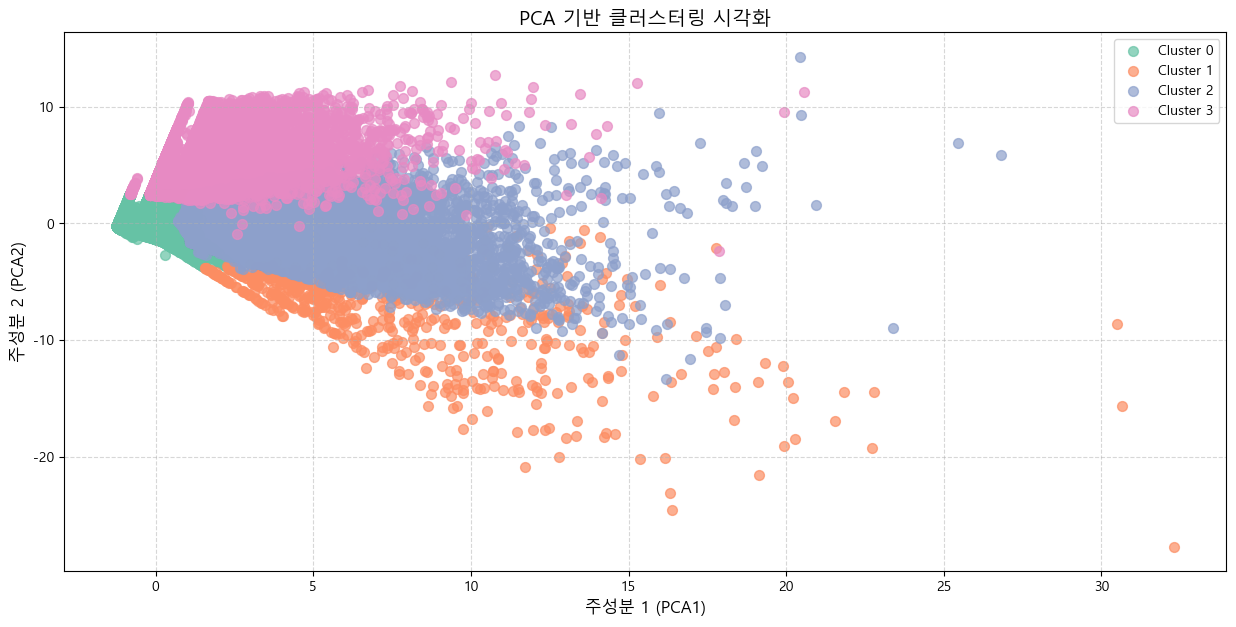

In [4]:
# PCA를 활용하여 2차원으로 차원 축소 후 시각화 

# 표준화 (PCA 및 KMeans 성능 향상)
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# K-Means 클러스터링
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_data_scaled)

# PCA 변환 (2차원 축소)
pca = PCA(n_components=2)
reduced_2d = pca.fit_transform(pca_data_scaled)

# 시각화
plt.figure(figsize=(15, 7))

# Seaborn의 Set2 색상 가져오기
palette = sns.color_palette("Set2", n_clusters)
cluster_colors = [palette[i] for i in clusters]

for i in range(n_clusters):
    plt.scatter(reduced_2d[clusters == i, 0], reduced_2d[clusters == i, 1], 
                label=f'Cluster {i}', alpha=0.7, s=50, color=palette[i])
'''
# 클러스터 중심점 (Centroids) 시각화
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=300, edgecolors='white', label='Centroids')
'''
# 그래프 설정
plt.title("PCA 기반 클러스터링 시각화", fontsize=14)
plt.xlabel("주성분 1 (PCA1)", fontsize=12)
plt.ylabel("주성분 2 (PCA2)", fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

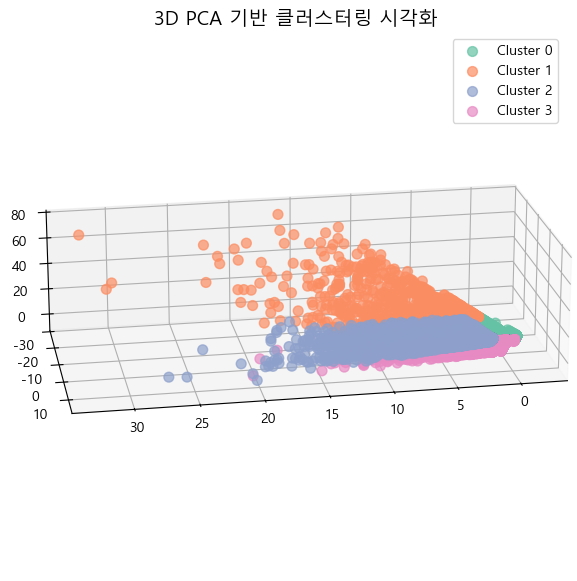

In [5]:
# PCA를 활용하여 3차원으로 차원 축소 후 3D 시각화 

# 표준화 (PCA 및 KMeans 성능 향상)
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# K-Means 클러스터링
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_data_scaled)

# PCA 변환 (3차원 축소)
pca = PCA(n_components=3)
reduced_3d = pca.fit_transform(pca_data_scaled)

# Seaborn의 Set2 색상 가져오기
palette = sns.color_palette("Set2", n_clusters)
cluster_colors = [palette[i] for i in clusters]

# 3D 시각화
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111, projection='3d')

# 클러스터 별 산점도
for i in range(n_clusters):
    ax.scatter(reduced_3d[clusters == i, 0], reduced_3d[clusters == i, 1], reduced_3d[clusters == i, 2], 
               label=f'Cluster {i}', alpha=0.7, s=50, color=palette[i])

# 그래프 설정
ax.set_box_aspect((15, 7, 4))  # (x축 비율, y축 비율, z축 비율), 3D시각화 조절의 핵심 코드

# 각 축 라벨 비활성화 
ax.set_title("3D PCA 기반 클러스터링 시각화", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.legend(loc='best', fontsize=10)

# 3D 회전 각도 설정 (조절 가능)
ax.view_init(elev=20, azim=80)

plt.show()
